# Todoist Data Analysis

This notebook processed the downloaded history of your todoist tasks. See [todoist_downloader.ipynb](https://github.com/markwk/qs_ledger/blob/master/todoist/todoist_downloader.ipynb) to export and download your task history from Todoist. 

---

In [5]:
import numpy as np, string, re, pytz
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

---

# Simple Data Analysis: Completed Tasks Per Month

In [6]:
past_tasks = pd.read_csv("data/todost-tasks-completed.csv")

In [7]:
totals_by_month = past_tasks.groupby(['month']).count()

In [8]:
totals_by_month.columns

Index(['content', 'id', 'meta_data', 'project_id', 'task_id', 'user_id',
       'project_name', 'year', 'date', 'day', 'hour', 'dow'],
      dtype='object')

In [9]:
totals_by_month.drop(['id', 'meta_data', 'project_id', 'task_id', 'user_id',
       'project_name', 'year', 'content', 'day', 'hour', 'dow'], axis=1, inplace=True)
totals_by_month.columns = ['Count']

In [10]:
totals_by_month.describe()

,Count
count,27.000000
mean,174.074074
std,43.982449
min,33.000000
25%,153.500000
50%,163.000000
75%,208.000000
max,248.000000


In [11]:
totals_by_month.index

Index(['2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12'],
      dtype='object', name='month')

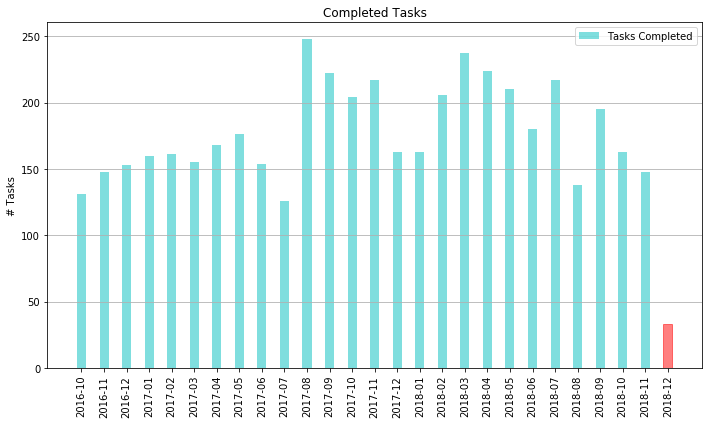

In [13]:
dataset = totals_by_month

n_groups = len(dataset)
opacity = 0.5
fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)
index = np.arange(n_groups)
bar_width = 0.4

data = plt.bar(index, dataset.Count, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Tasks Completed')

data[-1].set_color('r')

plt.ylabel('# Tasks')
plt.title('Completed Tasks')
plt.xticks(index, dataset.index, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

------

# Simple Data Analysis: Completed Tasks by Day of Week

In [27]:
past_tasks = pd.read_csv("data/todost-tasks-completed.csv")
past_tasks['dow'] = past_tasks['dow'].astype('category')

In [28]:
past_tasks.columns

Index(['content', 'id', 'meta_data', 'project_id', 'task_id', 'user_id',
       'project_name', 'year', 'month', 'date', 'day', 'hour', 'dow'],
      dtype='object')

In [18]:
past_tasks.groupby(['dow']).mean()

,id,meta_data,project_id,task_id,user_id,year,day,hour
dow,,,,,,,,
0,1.678238e+09,NaN,5.757333e+08,1.678238e+09,4288657.0,2017.248366,16.397603,15.552288
1,1.719801e+09,NaN,6.614258e+08,1.719801e+09,4288657.0,2017.233333,16.069231,15.385897
2,1.794777e+09,NaN,6.792919e+08,1.794777e+09,4288657.0,2017.266169,15.750000,15.873134
3,1.822767e+09,NaN,6.963709e+08,1.822767e+09,4288657.0,2017.304290,15.278820,15.723861
4,1.904480e+09,NaN,7.409456e+08,1.904480e+09,4288657.0,2017.292373,15.662429,15.703390
5,1.827033e+09,NaN,4.782744e+08,1.827033e+09,4288657.0,2017.331878,16.827511,15.903930
6,1.829335e+09,NaN,5.181488e+08,1.829335e+09,4288657.0,2017.320557,14.273519,16.235192


In [23]:
totals_dow = past_tasks.groupby(['dow']).count()

In [24]:
totals_dow.columns

Index(['content', 'id', 'meta_data', 'project_id', 'task_id', 'user_id',
       'project_name', 'year', 'month', 'date', 'day', 'hour'],
      dtype='object')

In [25]:
totals_dow.drop(['id', 'meta_data', 'project_id', 'task_id', 'user_id',
       'project_name', 'year', 'month', 'date', 'day', 'hour'], axis=1, inplace=True)
totals_dow.columns = ['Count']

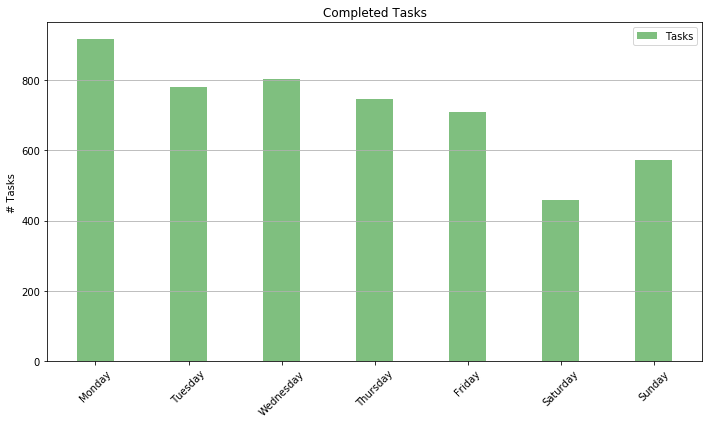

In [26]:
dataset = totals_dow

n_groups = len(dataset)
opacity = 0.5
fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)
index = np.arange(n_groups)
bar_width = 0.4

data = plt.bar(index, dataset.Count, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Tasks'
              )

dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.ylabel('# Tasks')
plt.title('Completed Tasks')
plt.xticks(index, dow_labels, rotation=45)
# ax.set_xticklabels(month_by_productivity.Productivity, rotation=70)
plt.legend()

plt.tight_layout()
plt.show()

-----

# Simple Data Analysis: Completed Tasks by Hour of the Day

In [29]:
hour_counts = past_tasks['hour'].value_counts().sort_index()

405

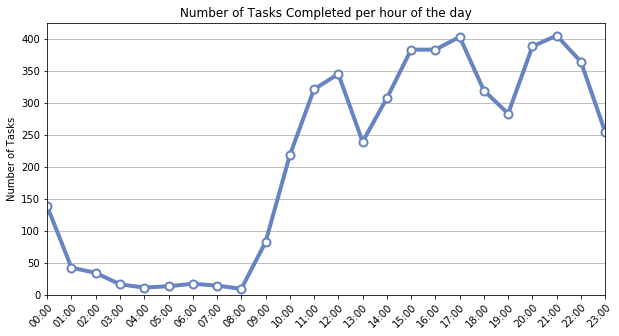

In [34]:
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hour_counts.index[0], hour_counts.index[-1]))

ax.yaxis.grid(True)
hour_max = hour_counts.max()
ax.set_ylim((0, hour_max+20))
ax.set_ylabel('Number of Tasks')
ax.set_xlabel('', )
ax.set_title('Number of Tasks Completed per hour of the day', )

plt.show()

----

## Daily Count

In [35]:
daily_counts = past_tasks['date'].value_counts().sort_index()

In [36]:
daily_counts.tail()

2018-12-02    5
2018-12-03    5
2018-12-04    6
2018-12-05    6
2018-12-06    6
Name: date, dtype: int64

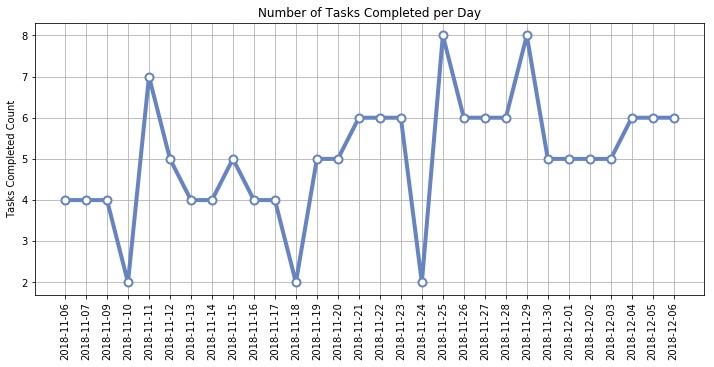

In [38]:
dataset = daily_counts.tail(30)

chart_title = 'Number of Tasks Completed per Day'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Tasks Completed Count')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

In [39]:
daily_counts.to_csv("data/todoist-daily-completed.csv", index=True)

-----